# Implementation of Logistic Regression

## Lybrarys import

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
%matplotlib inline

## Colleting Data

In [2]:
#open datase
df = pd.read_csv("titanic/train.csv")
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

## Analysis Data

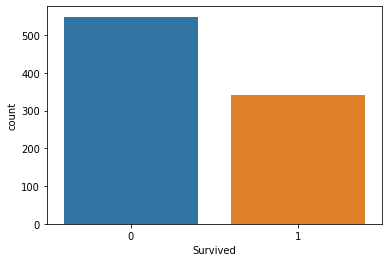

In [3]:
#survived or not survived
sns.countplot(x="Survived", data=df)

In [4]:
#How many male or female suvived
sns.countplot(x="Survived", hue="Sex", data=df)

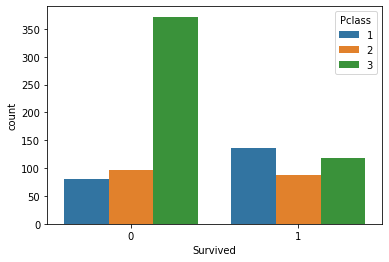

In [5]:
sns.countplot(x="Survived", hue="Pclass", data=df)

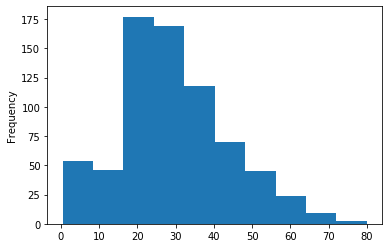

In [6]:
#Age of passangers
df["Age"].plot.hist()

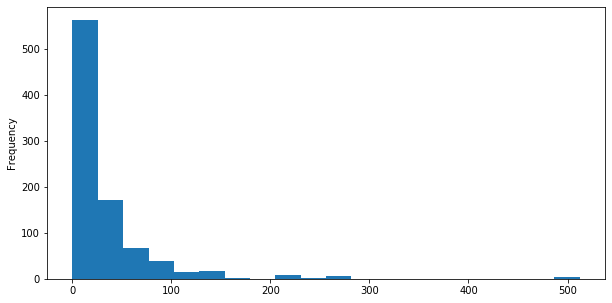

In [7]:
df["Fare"].plot.hist(bins=20, figsize=(10,5))

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


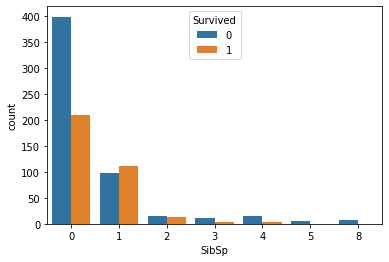

In [9]:
sns.countplot(x="SibSp", hue="Survived", data=df)

## Data Wrabling

In [10]:
#Data Wrabling
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

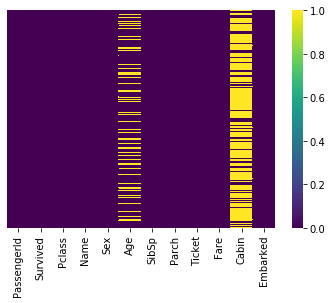

In [11]:
sns.heatmap(df.isnull(), yticklabels=False, cmap="viridis")

In [12]:
df.drop( "Cabin", axis=1, inplace= True)

In [13]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  
0      0         A/5 21171   7.2500        S  
1      0          PC 17599  71.2833        C  
2      0  STON/O2. 3101282   7.9250        S  
3      0            113803  53.1000        S  
4      0            373450   8.0500        S

In [14]:
df.dropna(inplace = True)

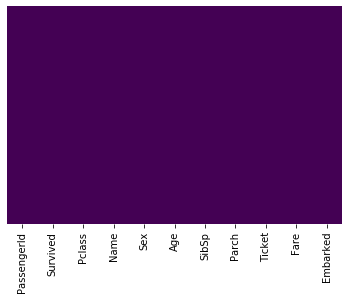

In [15]:
sns.heatmap(df.isnull(), yticklabels=False, cmap="viridis", cbar=False)

In [16]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [17]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  
0      0         A/5 21171   7.2500        S  
1      0          PC 17599  71.2833        C  
2      0  STON/O2. 3101282   7.9250        S  
3      0            113803  53.1000        S  
4      0            373450   8.0500        S

In [18]:
#Elimating the column female because we need just one comlumn for
#determinete the sex of people.
sex = pd.get_dummies(df["Sex"], drop_first=True)
sex.head()

male
0     1
1     0
2     0
3     0
4     1

In [19]:
embark = pd.get_dummies(df["Embarked"], drop_first=True)
embark.head()

Q  S
0  0  1
1  0  0
2  0  1
3  0  1
4  0  1

In [20]:
Pclass = pd.get_dummies(df["Pclass"], drop_first=True)
Pclass.head(5)

2  3
0  0  1
1  0  0
2  0  1
3  0  0
4  0  1

In [21]:
df = pd.concat([df, sex, embark, Pclass], axis=1)
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  male  Q  S  2  3  
0      0         A/5 21171   7.2500        S     1  0  1  0  1  
1      0          PC 17599  71.2833        C     0  0  0  0  0  
2      0  STON/O2. 3101282   7.9250        S     0  0  1  0  1  
3      0            113803  53.1000        S     0  0  1  0  0  
4      0            373450   8.0500        S     1  0  1  0  1

In [22]:
df.drop(["Sex", "Embarked", "PassengerId","Name", "Ticket"], axis=1, inplace = True)

In [23]:
df.head()

Survived  Pclass   Age  SibSp  Parch     Fare  male  Q  S  2  3
0         0       3  22.0      1      0   7.2500     1  0  1  0  1
1         1       1  38.0      1      0  71.2833     0  0  0  0  0
2         1       3  26.0      0      0   7.9250     0  0  1  0  1
3         1       1  35.0      1      0  53.1000     0  0  1  0  0
4         0       3  35.0      0      0   8.0500     1  0  1  0  1

In [24]:
df.drop("Pclass", axis=1, inplace=True)

In [25]:
df.head()

Survived   Age  SibSp  Parch     Fare  male  Q  S  2  3
0         0  22.0      1      0   7.2500     1  0  1  0  1
1         1  38.0      1      0  71.2833     0  0  0  0  0
2         1  26.0      0      0   7.9250     0  0  1  0  1
3         1  35.0      1      0  53.1000     0  0  1  0  0
4         0  35.0      0      0   8.0500     1  0  1  0  1

## Train & Test

In [26]:
X = df.drop('Survived', axis=1)
y = df['Survived']

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=50)

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
logmodel = LogisticRegression()

In [30]:
logmodel.fit(X_train, y_train)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
predictions = logmodel.predict(X_test)

## Metrics & Evaluated the Model

In [33]:
from sklearn.metrics import classification_report

classification_report(y_test, predictions)

'              precision    recall  f1-score   support\n\n           0       0.84      0.87      0.85       130\n           1       0.78      0.74      0.76        84\n\n    accuracy                           0.82       214\n   macro avg       0.81      0.80      0.81       214\nweighted avg       0.82      0.82      0.82       214\n'

In [34]:
from sklearn.metrics import confusion_matrix

In [35]:
confusion_matrix(y_test, predictions)

array([[113,  17],
       [ 22,  62]])

## Accuracy Check

In [36]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, predictions)

0.8177570093457944